# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('../../data/birds_withrange.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 87 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SpecID                         9597 non-null   float64
 1   PassNonPass                    9597 non-null   object 
 2   IOCOrder                       9597 non-null   object 
 3   BLFamilyLatin                  9597 non-null   object 
 4   BLFamilyEnglish                9597 non-null   object 
 5   BLFamSequID                    9597 non-null   float64
 6   Taxo                           9597 non-null   object 
 7   Scientific                     9597 non-null   object 
 8   English                        9597 non-null   object 
 9   Diet-Inv                       9597 non-null   float64
 10  Diet-Vend                      9597 non-null   float64
 11  Diet-Vect                      9597 non-null   float64
 12  Diet-Vfish                     9597 non-null   f

Review column values: 

In [4]:
columns = df.columns

df[[c for c in columns if df[c].dtype == 'object']].describe()

,PassNonPass,IOCOrder,BLFamilyLatin,BLFamilyEnglish,Taxo,Scientific,English,Diet-5Cat,Diet-Source,Diet-Certainty,...,ForStrat-EnteredBy,BodyMass-Source,BodyMass-Comment,Record-Comment,English name_x,Family,Global IUCN Red List Category,English name_y,Scientific Name,breeding_range
count,9597,9597,9597,9597,9597,9597,9597,9597,9597,9597,...,9597,9597,330,225,9597,9597,9597,7276,7276,6894
unique,2,40,194,194,2,9597,9592,5,31,5,...,9,10,19,1,9575,242,9,7272,7272,57
top,Passeriformes,Passeriformes,Tyrannidae,Tyrant-flycatchers,BL3,Circus buffoni,Hepatic Tanager,Invertebrate,Ref_4,A,...,Jessica,Dunning08,MarceloR,DataFromSplit,Green Jay,Tyrannidae (Tyrant-flycatchers),LC,Green Jay,Piranga hepatica,SA
freq,5705,5705,420,420,9511,1,2,4843,822,7639,...,6265,8321,307,225,2,415,7448,2,2,1907


In [5]:
df[[c for c in columns if df[c].dtype == 'float64']].describe()

,SpecID,BLFamSequID,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,...,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
count,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,...,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000,9597.000000
mean,7344.088569,113.086798,55.705950,2.566427,2.154840,2.718558,0.358445,0.597062,15.030739,5.852871,...,0.159946,0.000313,0.038137,0.039387,0.040325,0.016359,0.037512,0.147546,0.304366,0.158487
std,4654.524481,54.644212,37.116445,12.066963,7.674861,12.430603,3.797266,5.444774,25.631084,19.209428,...,0.366575,0.017679,0.191537,0.194525,0.196731,0.126859,0.190022,0.354668,0.460162,0.365216
min,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3434.000000,68.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6961.000000,109.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10829.000000,163.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,20107.000000,194.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


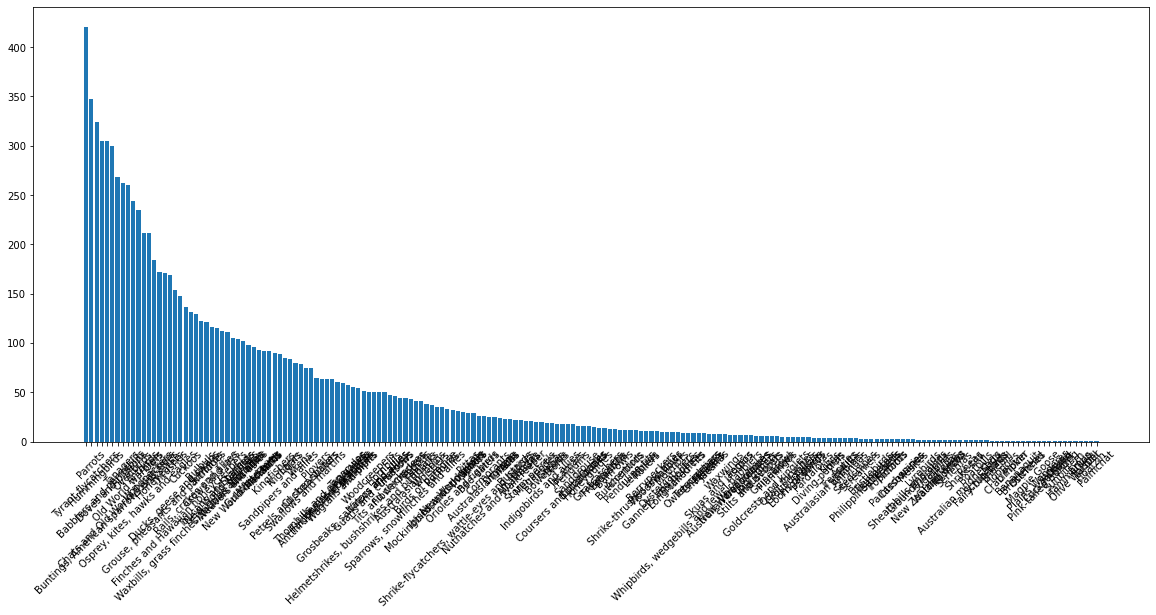

In [6]:
#review distribution of family
families= df['BLFamilyEnglish'].value_counts()

fig, axs = plt.subplots(figsize=(20,8))
plt.bar(x=families.index, height=families)
plt.xticks(rotation = 45)
plt.show();

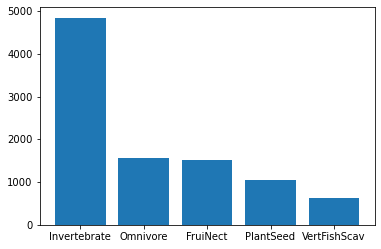

In [7]:
#review distribution of diet
diet = df['Diet-5Cat'].value_counts()
plt.bar(x=diet.index, height=diet);

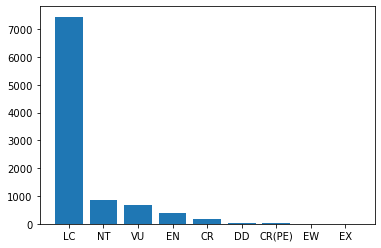

In [8]:
#review threatened distribution
red_list = df['Global IUCN Red List Category'].value_counts()
plt.bar(x=red_list.index, height=red_list);

In [9]:
#create threatened column
df['threatened'] = 0

df.loc[(df['Global IUCN Red List Category'] == 'VU') |
      (df['Global IUCN Red List Category'] == 'EN') |
      (df['Global IUCN Red List Category'] == 'CR') |
      (df['Global IUCN Red List Category'] == 'CR(PE)'), 'threatened'] = 1

df.drop('Global IUCN Red List Category', axis=1, inplace=True)

 Threatened distribution: 
 0    0.870897
1    0.129103
Name: threatened, dtype: float64


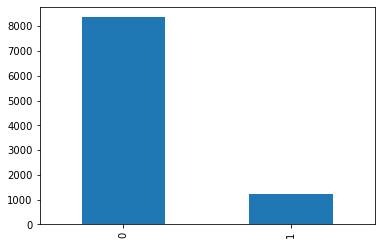

In [10]:
#observe distribution 
df['threatened'].value_counts().plot(kind="bar");

print(f' Threatened distribution: \n',df['threatened'].value_counts(normalize=True))

In [11]:
df['Nocturnal'].value_counts()

0.0    9280
1.0     317
Name: Nocturnal, dtype: int64

<AxesSubplot:>

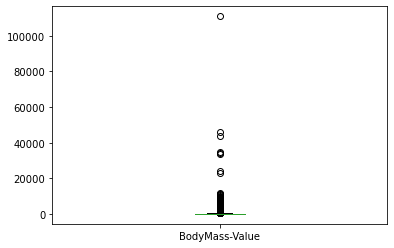

In [12]:
df['BodyMass-Value'].plot(kind='box', y='weight in grams')

In [13]:
#remove BodyMass outlier
df = df[df['BodyMass-Value'] < 20000]

In [14]:
#birds that breed exclusively in one country
df['endemic_breeding'].value_counts()

0.0    7117
1.0    2472
Name: endemic_breeding, dtype: int64

In [15]:
categorical  = ['PassNonPass', 'Diet-5Cat']

numerical = ['BodyMass-Value']

diet_columns = ['Diet-Inv', 'Diet-Vend', 'Diet-Vect', 'Diet-Vfish', 'Diet-Vunk', 'Diet-Scav', 
                'Diet-Fruit', 'Diet-Nect', 'Diet-Seed', 'Diet-PlantO']

forstrat_columns = ['ForStrat-wataroundsurf', 'ForStrat-ground', 'ForStrat-understory', 'ForStrat-midhigh', 
                    'ForStrat-canopy', 'ForStrat-aerial', 'PelagicSpecialist', 'ForStrat-Source', 'ForStrat-SpecLevel']

location_columns= ['africa', 'antarctica', 'asia', 'australasia', 'caribbean', 
                   'central_amer', 'central_asia', 'europe', 'high_seas', 'mid_east', 
                   'north_amer', 'oceania', 'south_amer']

threat_columns = ['agriculture_threat', 'biological_threat', 'climate_change_threat', 'energy_mining_threat', 
                  'geological_threat', 'human_intrusions_threat', 'natural_systems_threat', 'pollution_threat', 
                  'res_comm_dev_threat', 'transportation_threat', 'invasive_threat', 'artificial_aquatic']

habitat_columns = ['artificial_aquatic', 'artificial_terrestrial', 'caves_subterranean', 'desert', 'forest',
           'grassland', 'introduced_vegetation', 'marine_coastal_supratidal', 'marine_intertidal', 
           'marine_neritic', 'marine_oceanic', 'rocky_areas', 'savanna', 'shrubland', 'wetlands_inland',]

flag_cols = ['Nocturnal', 'endemic_breeding']

df['num_habitats'] = df[habitat_columns].sum(axis=1)
df['num_threats'] = df[threat_columns].sum(axis=1)
df['num_locations'] = df[location_columns].sum(axis=1)
df['Diet-Vertebrates'] = df[['Diet-Vend', 'Diet-Vect', 'Diet-Vunk']].sum(axis=1)


In [16]:
ohe_col = df[categorical]

#instantiate & apply OHE
ohe = OneHotEncoder(categories='auto', sparse=False)
cat_transformed = ohe.fit_transform(ohe_col)
df_ohe = pd.DataFrame(cat_transformed, columns=ohe.get_feature_names(), index=df.index)

#concat
df = pd.concat([df, df_ohe], axis=1)

In [17]:
to_remove = ['SpecID', 'PassNonPass', 'IOCOrder', 'BLFamilyLatin', 'BLFamilyEnglish', 'BLFamSequID', 'Taxo',
            'Scientific', 'English', 'Diet-5Cat', 'Diet-Source', 'Diet-Certainty', 'Diet-EnteredBy', 
            'BodyMass-Source', 'BodyMass-SpecLevel', 'BodyMass-Comment', 'Record-Comment', 'Family',
            'breeding_range', 'ForStrat-Source', 'ForStrat-EnteredBy', 'Diet-Vend', 'Diet-Vect', 
             'Diet-Vunk', 'English name_x', 'English name_y', 'Scientific Name']

df.drop(columns=to_remove, inplace=True)

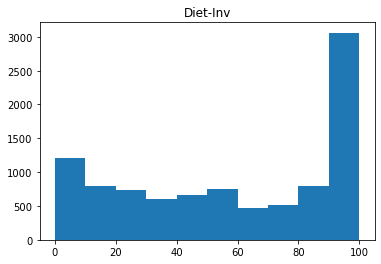

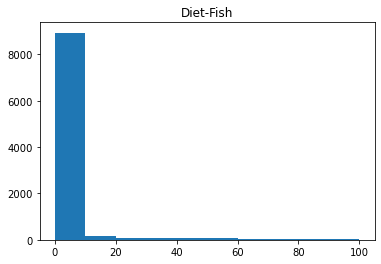

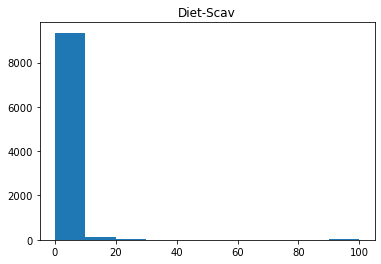

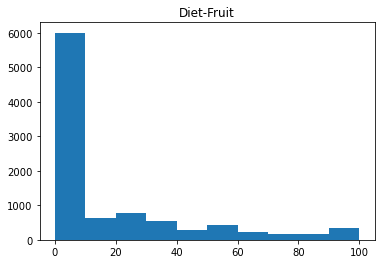

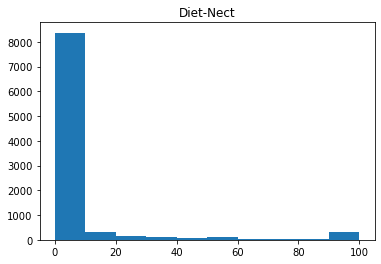

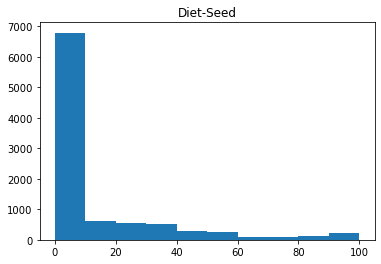

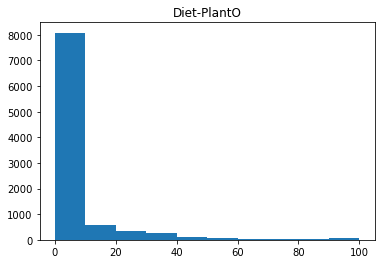

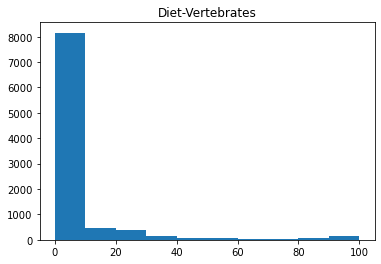

In [18]:
df.rename(columns={'Diet-Vfish':'Diet-Fish'}, inplace=True)

diets = ['Diet-Inv', 'Diet-Fish', 'Diet-Scav', 
         'Diet-Fruit', 'Diet-Nect', 'Diet-Seed', 'Diet-PlantO', 'Diet-Vertebrates']

for diet in diets:
    fig, ax = plt.subplots()
    plt.hist(df[diet])
    ax.set_title(diet)
    plt.show();

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9589 entries, 5 to 9596
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diet-Inv                   9589 non-null   float64
 1   Diet-Fish                  9589 non-null   float64
 2   Diet-Scav                  9589 non-null   float64
 3   Diet-Fruit                 9589 non-null   float64
 4   Diet-Nect                  9589 non-null   float64
 5   Diet-Seed                  9589 non-null   float64
 6   Diet-PlantO                9589 non-null   float64
 7   ForStrat-watbelowsurf      9589 non-null   float64
 8   ForStrat-wataroundsurf     9589 non-null   float64
 9   ForStrat-ground            9589 non-null   float64
 10  ForStrat-understory        9589 non-null   float64
 11  ForStrat-midhigh           9589 non-null   float64
 12  ForStrat-canopy            9589 non-null   float64
 13  ForStrat-aerial            9589 non-null   float

In [20]:
df_small = df[diets + threat_columns + ['num_habitats', 'num_threats', 'num_locations'] + numerical + flag_cols]
df_small.head()

,Diet-Inv,Diet-Fish,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO,Diet-Vertebrates,agriculture_threat,biological_threat,...,res_comm_dev_threat,transportation_threat,invasive_threat,artificial_aquatic,num_habitats,num_threats,num_locations,BodyMass-Value,Nocturnal,endemic_breeding
5,80.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2320.51,1.0,1.0
6,80.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4.0,1.0,1.0,1238.29,1.0,1.0
7,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2022.68,1.0,1.0
8,10.0,0.0,0.0,40.0,0.0,30.0,20.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1600.10,0.0,0.0
9,20.0,0.0,0.0,40.0,0.0,20.0,20.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,3.0,4.0,1.0,1386.41,0.0,0.0


In [21]:
df.to_csv('df.csv', columns=df.columns, index=False)
df_small.to_csv('df_small.csv', columns=df_small.columns, index=False)

#### Additional Engineered Columns

In [22]:
df['ag+habitat'] = 0 
df.loc[(df['agriculture_threat']==1) & (df['num_habitats']==1), 'ag+habitat'] = 1

In [23]:
df_clean = df.copy()

threats = ['agriculture_threat', 'biological_threat', 'climate_change_threat', 'energy_mining_threat',
          'geological_threat', 'human_intrusions_threat', 'natural_systems_threat', 'pollution_threat', 
          'res_comm_dev_threat', 'transportation_threat', 'invasive_threat']

regions = ['africa', 'antarctica', 'asia', 'australasia', 'caribbean', 'central_amer', 'central_asia',
          'europe', 'high_seas', 'mid_east', 'north_amer', 'oceania', 'south_amer']

df_clean['num_threats'] = df_clean[threats].sum(axis=1)
df_clean['num_regions'] = df_clean[regions].sum(axis=1)

df_clean['marine_hab'] = 0
df_clean.loc[(df_clean['marine_coastal_supratidal'] == 1) |
             (df_clean['marine_intertidal'] == 1) |
             (df_clean['marine_neritic'] == 1) |
             (df_clean['marine_oceanic'] == 1), 'marine_hab'] = 1

df_clean['marine_x_pollution'] = df_clean['marine_hab'] * df_clean['pollution_threat']
df_clean['marine_x_climatechg'] = df_clean['marine_hab'] * df_clean['climate_change_threat']

df_clean['inv+habitat'] = 0 
df_clean.loc[(df_clean['invasive_threat']==1) & (df_clean['num_habitats']==1), 'inv+habitat'] = 1

df_clean['all+habitat'] = 0 
df_clean.loc[(df_clean['num_threats']>=3) & (df_clean['num_habitats']==1), 'inv+habitat'] = 1

df = df_clean.copy()